In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Color Mappings
### Open cv2 gives default BGR
### Will need to convert to RGB

In [4]:
img = cv2.imread('DATA/00-puppy.jpg')

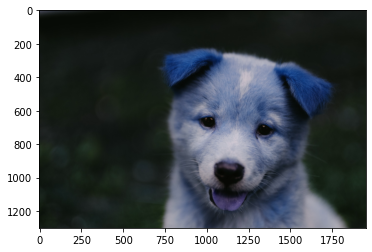

In [6]:
plt.imshow(img)

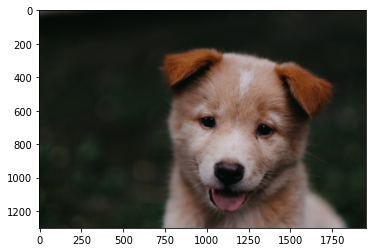

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

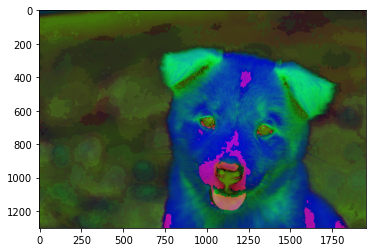

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)

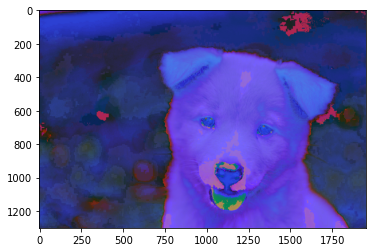

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.imshow(img)

# Blending and Pasting

In [10]:
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

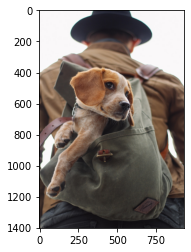

In [11]:
plt.imshow(img1)

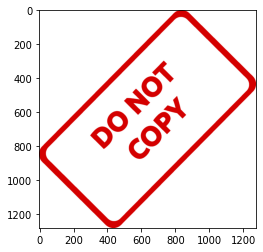

In [12]:
plt.imshow(img2)

In [13]:
img1.shape

(1401, 934, 3)

In [14]:
img2.shape

(1280, 1277, 3)

### Blending imgs of same size

In [16]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

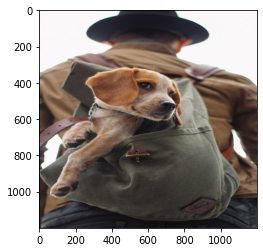

In [17]:
plt.imshow(img1)

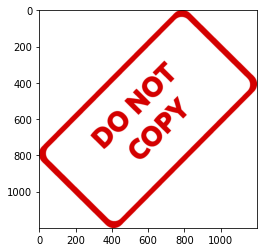

In [18]:
plt.imshow(img2)

In [19]:
# now same size, lets blend
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

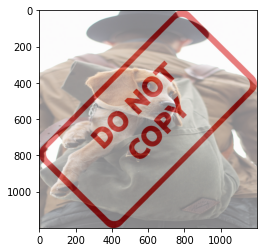

In [20]:
plt.imshow(blended)

In [25]:
# addweighted only works on same size images
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)

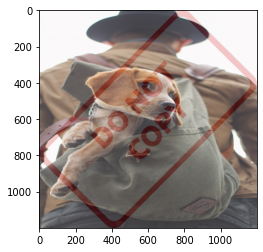

In [26]:
plt.imshow(blended)

In [29]:
# overlay small image on top of large image (no blending)
# numpy reassignment 
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [30]:
img2 = cv2.resize(img2, (600,600))

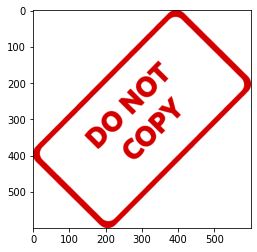

In [31]:
plt.imshow(img2)

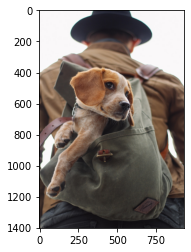

In [34]:
plt.imshow(img1)

In [33]:
large_img = img1
small_img = img2

In [35]:
x_offset = 0
y_offset = 0

In [41]:
# numpy is different then shape
small_img.shape

(600, 600, 3)

In [37]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [39]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

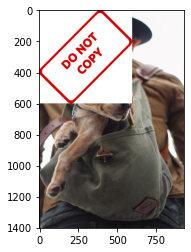

In [40]:
plt.imshow(large_img)

In [42]:
# Blend together images of different sizes
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [43]:
img2 = cv2.resize(img2, (600,600))

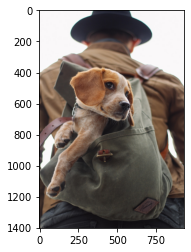

In [44]:
plt.imshow(img1)

In [45]:
img1.shape

(1401, 934, 3)

In [47]:
# need to get ROI
x_offset = 934 - 600
y_offset = 1401 - 600

In [49]:
img2.shape

(600, 600, 3)

In [50]:
rows, cols, channels = img2.shape

In [52]:
roi = img1[y_offset:1401, x_offset:943]

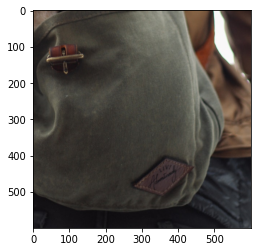

In [53]:
plt.imshow(roi)

In [54]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

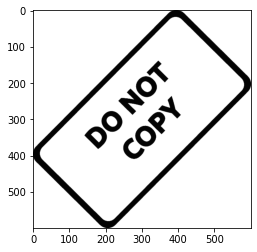

In [57]:
plt.imshow(img2gray, cmap='gray')

In [58]:
mask_inv = cv2.bitwise_not(img2gray)

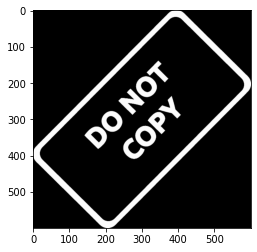

In [60]:
plt.imshow(mask_inv, cmap='gray')

In [61]:
mask_inv.shape

(600, 600)

In [62]:
import numpy as np

In [63]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

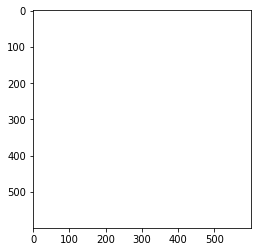

In [64]:
plt.imshow(white_background)

In [65]:
background = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [66]:
background.shape

(600, 600, 3)

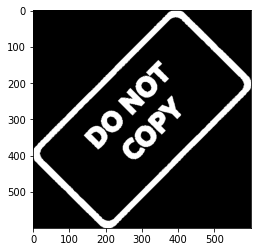

In [68]:
# now we have it for all 3 channels
plt.imshow(background)

In [69]:
foreground = cv2.bitwise_or(img2, img2, mask=mask_inv)

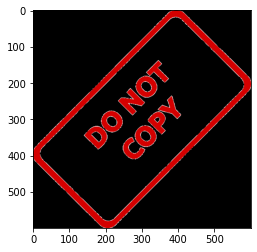

In [70]:
plt.imshow(foreground)

In [71]:
final_roi = cv2.bitwise_or(roi, foreground)

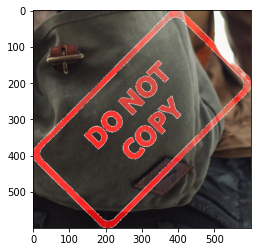

In [72]:
plt.imshow(final_roi)

In [73]:
large_img = img1
small_img = final_roi

In [74]:
large_img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset+img.shape[1]] = small_img

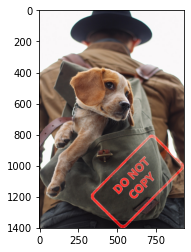

In [75]:
plt.imshow(large_img)

# Image thresholding

In [77]:
img = cv2.imread('DATA/rainbow.jpg')

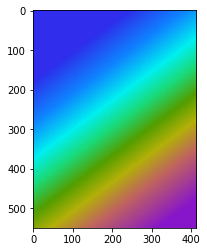

In [78]:
plt.imshow(img)

In [79]:
# give grayscale
img = cv2.imread('DATA/rainbow.jpg', 0)

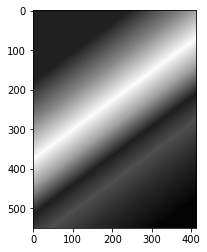

In [81]:
plt.imshow(img, cmap='gray')

In [83]:
# Take half of 255
# anything below will be shifted to 0, above will be 1
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [84]:
ret

127.0

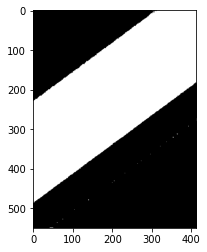

In [85]:
plt.imshow(thresh1, cmap='gray')

In [86]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

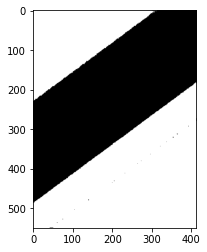

In [87]:
plt.imshow(thresh1, cmap='gray')

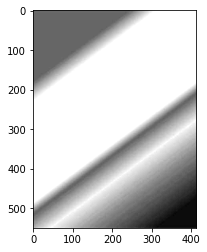

In [88]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh1, cmap='gray')

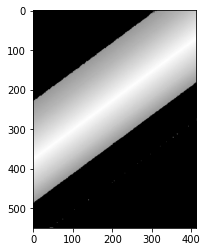

In [89]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh1, cmap='gray')

In [90]:
img = cv2.imread('DATA/crossword.jpg', 0)

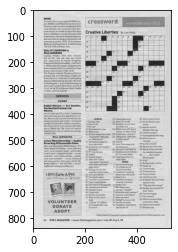

In [91]:
plt.imshow(img, cmap='gray')

In [94]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

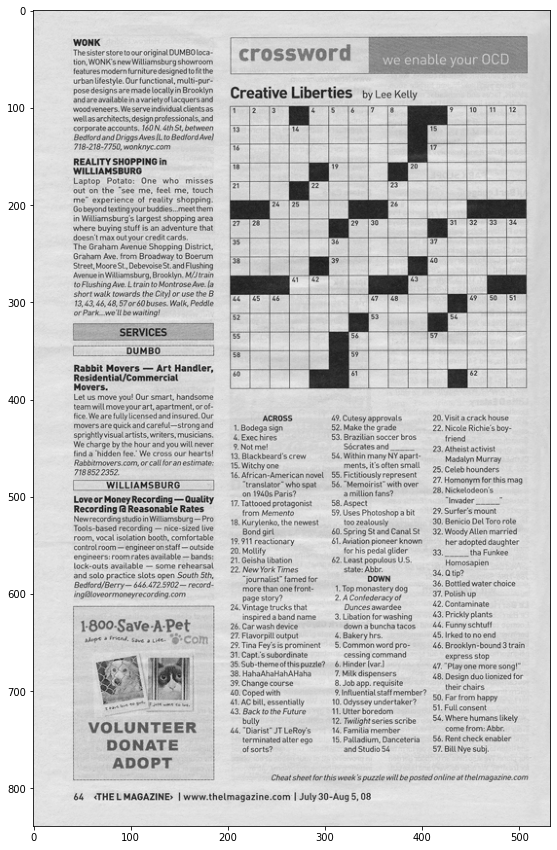

In [95]:
show_pic(img)

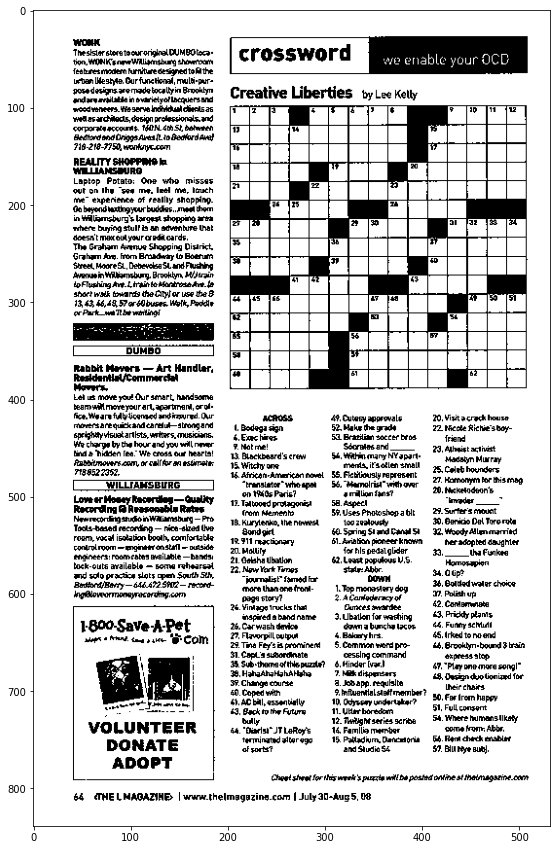

In [98]:
ret, th1 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
show_pic(th1)

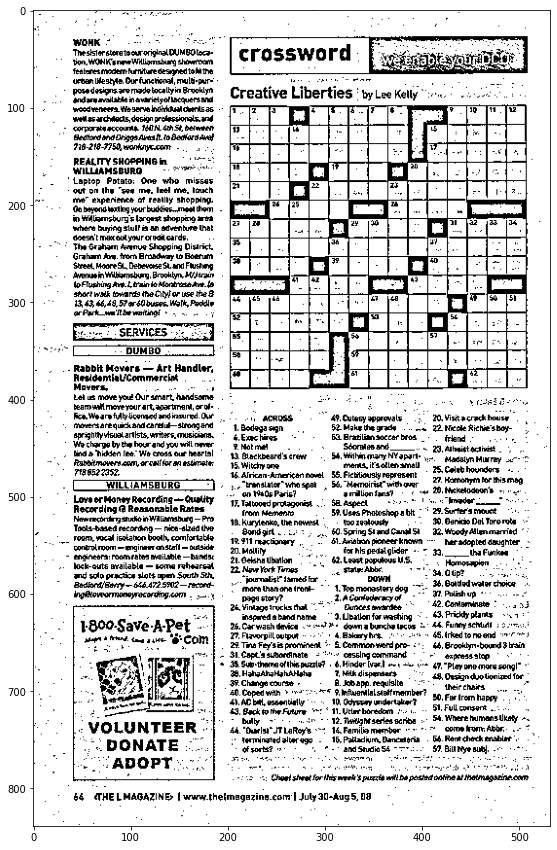

In [102]:
# adaptive threshold
# playing with these params usually best practice
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 
                            11, 8)
show_pic(th2)

In [100]:
# blend the two
blended = cv2.addWeighted(src1=th1, alpha=0.6, src2=th2, beta=0.4, gamma=0)

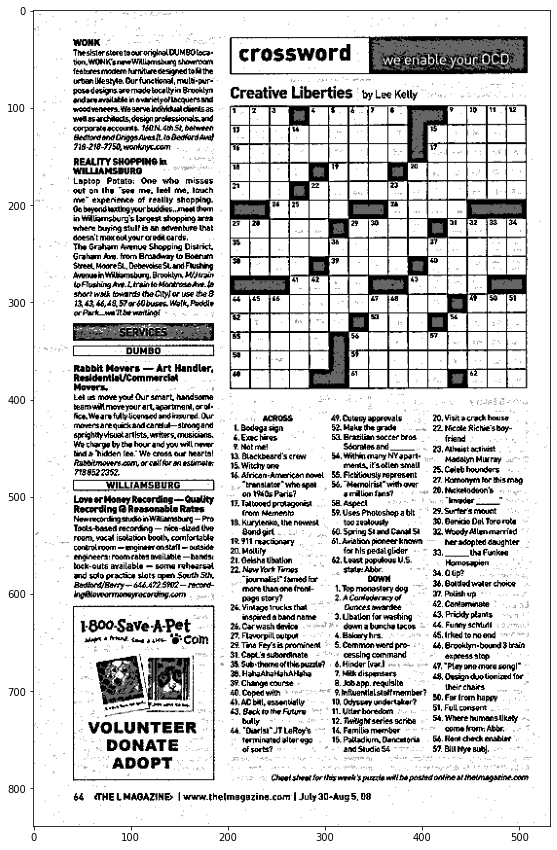

In [101]:
show_pic(blended)